Import all the dependencies 

In [25]:
import pandas as pd  
import numpy as np  #data manipulation
import matplotlib.pyplot as plt  #data visulaization
import seaborn as sns
from sklearn.model_selection import train_test_split #for splitting test and trained data
from xgboost import XGBRegressor 
from sklearn import metrics  # for model evaluation

Data Collection and Processing

In [26]:
#loading data from csv file to pandas data frame
calories_data = pd.read_csv('calories.csv', encoding = 'unicode_escape')

In [27]:
#print first five rows 
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [28]:
exercise_data = pd.read_csv('exercise.csv',encoding = 'unicode_escape')

In [29]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining The Two DataFrames

In [30]:
comb_data = pd.concat([exercise_data, calories_data['Calories']],axis = 1)  #axis is 1 because we want to merge column wise

In [31]:
comb_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


As you can see, the column has been merged.

In [32]:
#checking the number of rows and columns in the dataset
comb_data.shape

(15000, 9)

In [33]:
# getting some information about the data
comb_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


you can see data doesn't contain any null values

In [34]:
comb_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis 

In [35]:
# get some statistical measures about the data
comb_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization 

In [36]:
sns.set()  #it will give some theme or background color to our plots

<Axes: xlabel='Gender', ylabel='count'>

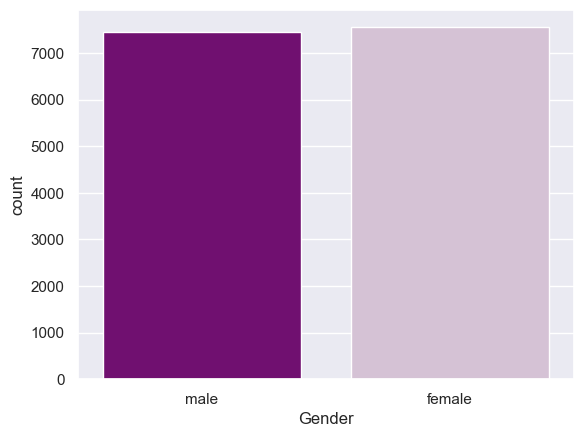

In [37]:
#plotting the gender column in count plot
sns.countplot(x = 'Gender', data = comb_data, hue = 'Gender', palette = ['#800080','#D8BFD8'] )

<Axes: xlabel='Age', ylabel='Density'>

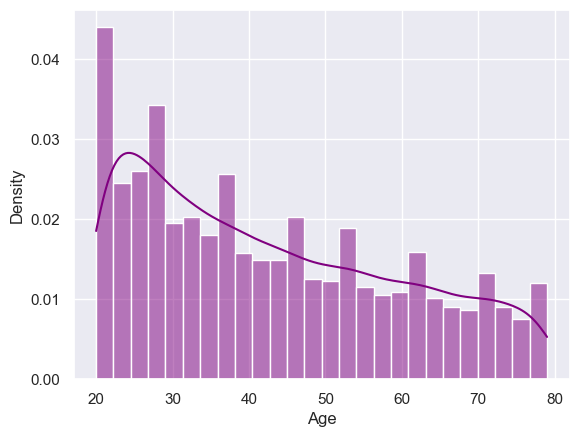

In [38]:
#finding the distribution of "Age" column
sns.histplot(comb_data['Age'],kde = True, stat= "density",color='#800080')

From the above graph we can see that age group from 20-30 are doing more exercise (old people do less exercise)

<Axes: xlabel='Height', ylabel='Count'>

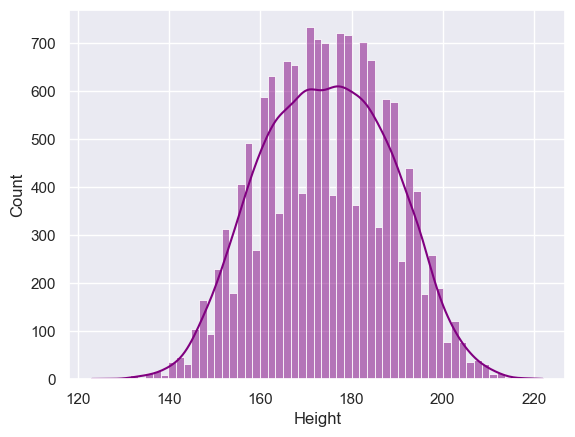

In [39]:
#finding the distribution of "Height" column
sns.histplot(comb_data['Height'], kde = True,color='#800080')

<Axes: xlabel='Weight', ylabel='Count'>

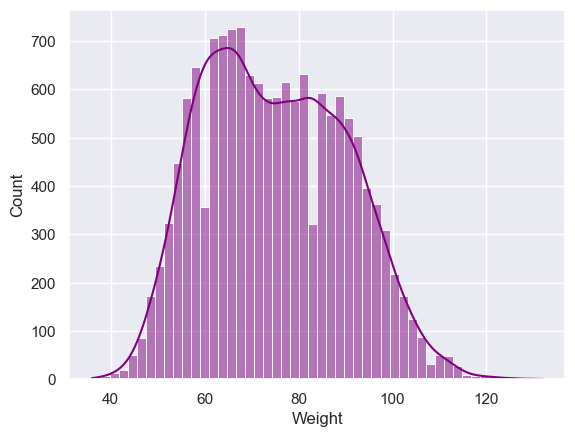

In [40]:
# finding the distribution of "Weight" column
sns.histplot(comb_data['Weight'],kde = True,color='#800080')

you can see we have more people in the weight of around 60 and we also have some increased value in between 70-80

<Axes: xlabel='Duration', ylabel='Count'>

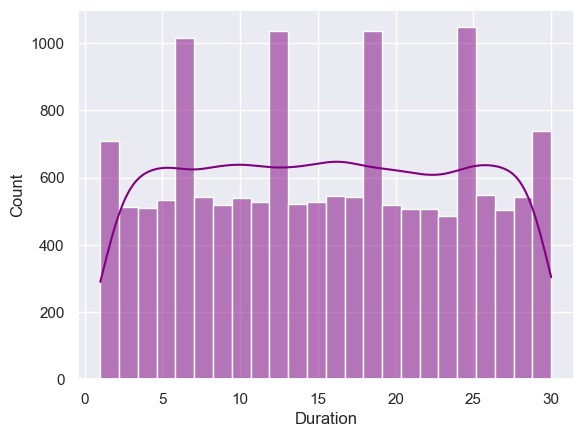

In [41]:
# finding the distribution of "Duration" column
sns.histplot(comb_data['Duration'],kde = True,color="purple")

<Axes: xlabel='Heart_Rate', ylabel='Count'>

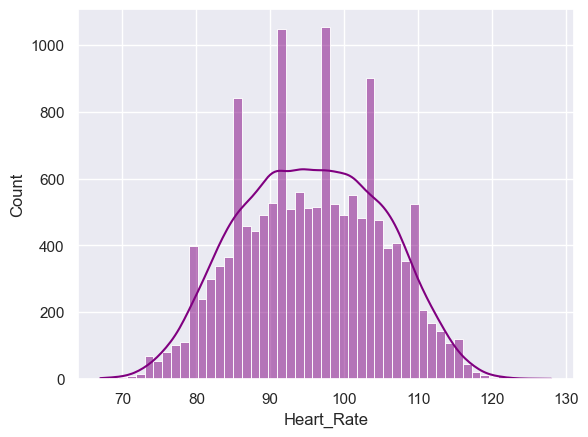

In [42]:
# finding the distribution of "Heart_rate" column
sns.histplot(comb_data['Heart_Rate'],kde = True,color = "#800080")

<Axes: xlabel='Body_Temp', ylabel='Count'>

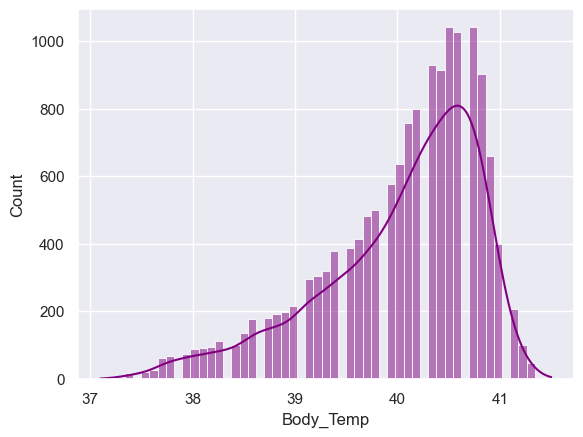

In [43]:
# finding the distribution of "Body_Temp" column
sns.histplot(comb_data['Body_Temp'],kde = True,color = "#800080")

Finding the correlation in the dataset

<Axes: >

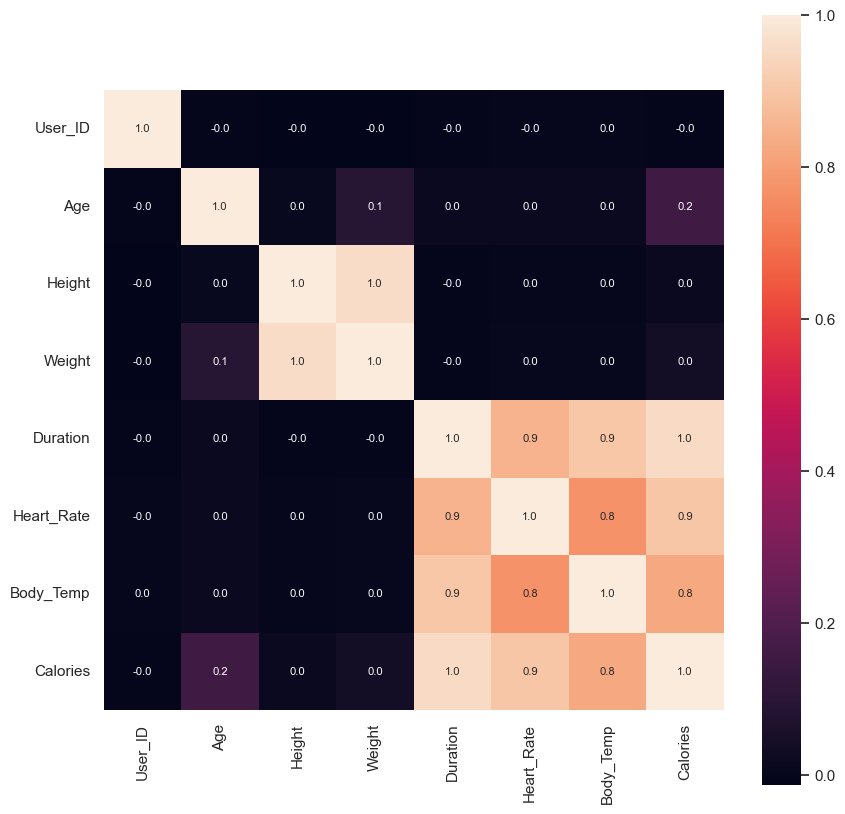

In [44]:
# Now we will check which column is positively correlated and which is neagatively 
numeric_data = comb_data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws={'size':8})

we can say that height and weight are positively correlated and duration, heart rate and body temp are highly positively correlated with calories 

Converting the text data to numerical values

In [45]:
comb_data.replace({"Gender":{'male':0,'female':1}},inplace = True)

C:\Users\ENVY\AppData\Local\Temp\ipykernel_352608\93965633.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comb_data.replace({"Gender":{'male':0,'female':1}},inplace = True)


In [46]:
comb_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and target

In [49]:
x = comb_data.drop(columns=['User_ID','Calories'],axis = 1)
y = comb_data['Calories']

In [50]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [51]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)  #20% data is for test data

In [57]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training 

In [58]:
#XGBoost Regressor
# loading the model
model = XGBRegressor()

In [59]:
# training the model with x_train 
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation 

In [60]:
# prediction on test data
test_data_prediction = model.predict(x_test)

In [61]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Now we will compare predicted values to original values

Mean Absolute Error

In [63]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [65]:
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  1.4833678883314132


Building a Predictive System

In [67]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8)

# changing input data to numpy array 
input_data_as_numpy_arr = np.asarray(input_data)

# reshape the array 
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

pred_value = model.predict(input_data_reshaped)

In [68]:
print(pred_value)

[236.13371]


In [69]:
print('The Calories burnt is : ', pred_value[0])

The Calories burnt is :  236.13371


Thank you!!!!!